In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#Data set ini menampilkan data nasabah yang pengajuan pinajamnnya diterima atau ditolak
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv')
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [ ]:
data.info()
print()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB



Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

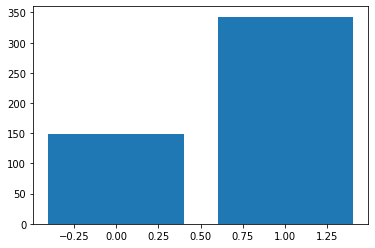

,Loan_Status,count
0,0,148
1,1,343


In [ ]:
""" 
Melihat berapa banyak nasabah yang pengajuan pinjamannya diterima dan ditolak.
Sebanyak 343 nasabah yang mengajukan pinjaman diterima dan sisanya 148 ditolak.
"""
status = data.groupby('Loan_Status').agg(count = ('Loan_Status','count')).reset_index()
plt.bar(status['Loan_Status'],status['count'])
plt.show() 
print()
status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Loan Status - Credit History')

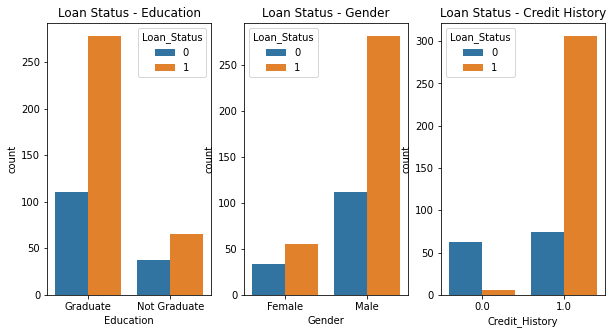

In [ ]:
# Mengetahui loan status berdasarkan variable lain
f,ax = plt.subplots(1,3,figsize=(10,5))
sns.countplot(data.Education,hue=data.Loan_Status,ax=ax[0])
ax[0].set_title('Loan Status - Education',)
sns.countplot(data.Gender,hue=data.Loan_Status,ax=ax[1])
ax[1].set_title('Loan Status - Gender',)
sns.countplot(data.Credit_History,hue=data.Loan_Status,ax=ax[2])
ax[2].set_title('Loan Status - Credit History')

"""
Chart 1: Berdasarkan presentasenya, nasabah dengan level pendidikan 'Graduate' lebih besar untuk pinjamannya disetujui.
Chart 2: Berdasarkan presentasenya, nasabah laki-laki lebih banyak yang disetujui pinjamannya.
Chart 3: Nasabah yang memiliki credit history sangat besar kemungkinannya untuk diterima pinjamannya
"""

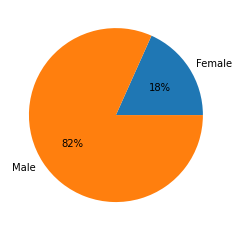

In [ ]:
# Mengetahui presentase gender nasabah. Dari total nasabah, 82% adalah laki-laki dan 18% adalah perempuan
gender = data.groupby('Gender').agg(count = ('Gender','count')).reset_index()
plt.pie(gender['count'],labels = gender['Gender'],autopct='%1.0f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


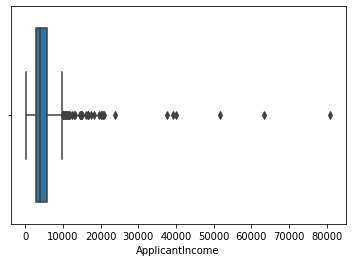

In [ ]:
"""
Melihat sebaran data pendapatan nasabah dengan boxplot. 
pengamatan max berada disekitar 10.000, lebih dari itu merupakan outlier
"""
sns.boxplot(data.ApplicantIncome)

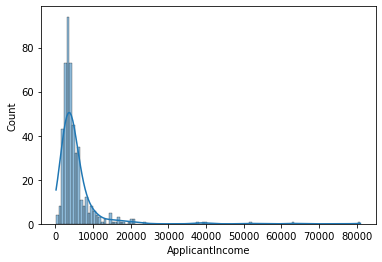

In [ ]:
"""
Melihat sebaran data pendapatan nasabah dengan histogram.
Terlihat sebaran data right skewed.
"""
sns.histplot(data= data, x = 'ApplicantIncome', kde=True)
plt.show()

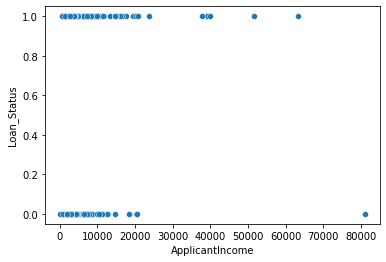

In [ ]:
"""
Melihat hubungan pendapatan dengan diterimanya pengajuan pinjaman.
Pendapatan besar belum tentu pengajuan pinjaman disetujui.
"""
sns.scatterplot(x=data['ApplicantIncome'],y=data['Loan_Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


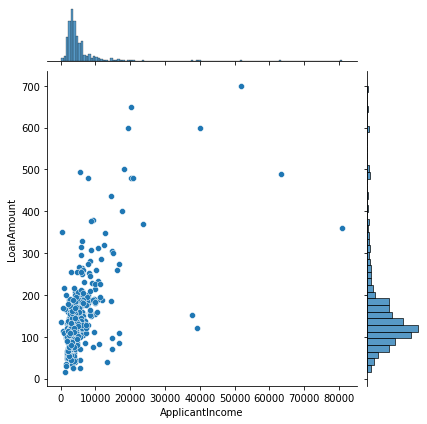

In [ ]:
""" 
Melihat hubungan pendapatan dengan jumlah pinjaman.
Sebaran pendapatan nasabah berpusat sampai 10.000, sedangkan jumlah pinjaman berpusat sampai 200.
"""
sns.jointplot('ApplicantIncome','LoanAmount',data)

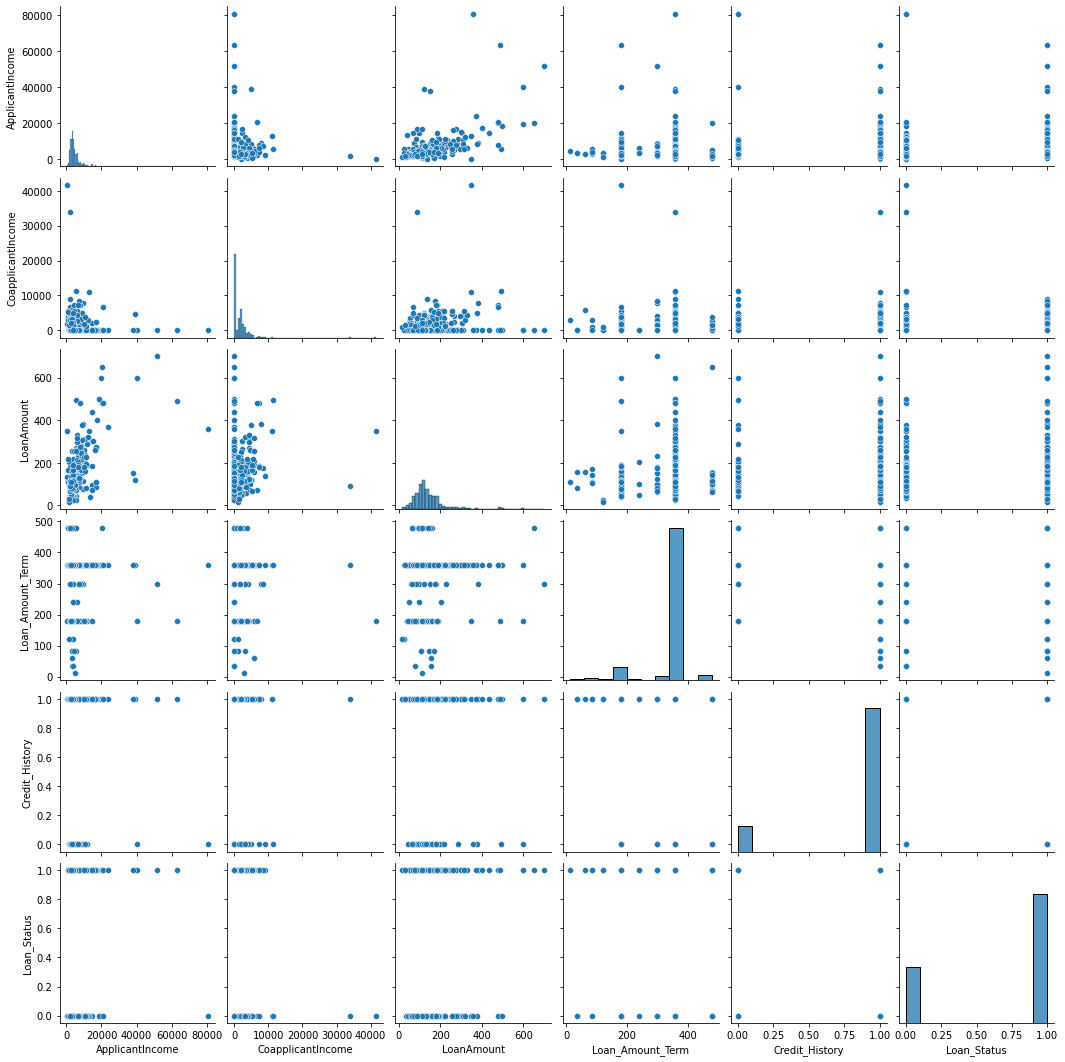

In [ ]:
# Melihat hubungan antar setiap variable
sns.pairplot(data.iloc[:,1:])

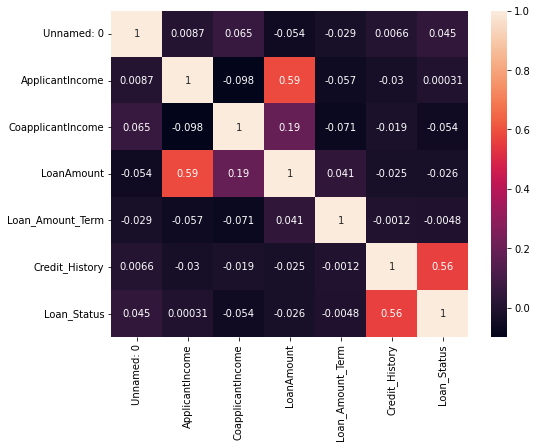

In [ ]:
"""
Heatmap untuk melihat korelasi variable apa saja yang mempengaruhi diterima atau tidaknya pinjaman.
Variable yang paling mempengaruhi loan status adalah credit history.
Dan variable yang paling mempengaruhi jumlah pinjaman adalah jumlah pendapatan dan pendapatan partner.
"""
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot = True)
plt.show()

Kesimpulan: Dari data diatas, kita dapat melihat dengan jelas bahwa faktor yang paling mempengaruhi jumlah pinjaman adalah income nasabah dan income partner. Tetapi, faktor yang paling mempengaruhi diterimanya pengajuan pinjaman dilihat dari credit historynya.

Pendapatan besar tidak menjamin bahwa pinjaman akan diterima, ada faktor lain yang menjadi pertimbangan.